<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n250.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,60.589589,47.924137,79.878954,95.199538,0.429597,294.021816,293.814145,0.207671
1,0.0,1.0,68.204224,91.233157,67.579241,89.329399,1.246329,327.592350,326.704118,0.888231
2,0.0,2.0,42.981227,91.180883,21.305890,92.040546,-1.101691,256.406855,257.868618,-1.461763
3,0.0,3.0,60.902847,59.668501,32.808622,64.857746,1.072183,229.309900,228.444094,0.865806
4,0.0,4.0,67.028579,78.431244,28.913956,75.754792,0.252265,260.380836,260.452277,-0.071441
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,67.265099,22.648191,39.011641,91.091175,-1.033359,228.982747,229.898639,-0.915893
119996,999.0,116.0,75.460454,25.183230,32.971516,88.010631,0.287760,231.913591,231.521348,0.392243
119997,999.0,117.0,24.176393,75.180164,84.243343,77.292641,0.876774,271.769315,270.798947,0.970368
119998,999.0,118.0,31.729336,87.187336,63.249361,39.772438,0.760959,232.699431,231.920638,0.778793


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,60.589589,47.924137,79.878954,95.199538,0.429597,294.021816,293.814145,0.207671
1,0.0,1.0,68.204224,91.233157,67.579241,89.329399,1.246329,327.592350,326.704118,0.888231
2,0.0,2.0,42.981227,91.180883,21.305890,92.040546,-1.101691,256.406855,257.868618,-1.461763
3,0.0,3.0,60.902847,59.668501,32.808622,64.857746,1.072183,229.309900,228.444094,0.865806
4,0.0,4.0,67.028579,78.431244,28.913956,75.754792,0.252265,260.380836,260.452277,-0.071441
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,67.265099,22.648191,39.011641,91.091175,-1.033359,228.982747,229.898639,-0.915893
119996,999.0,116.0,75.460454,25.183230,32.971516,88.010631,0.287760,231.913591,231.521348,0.392243
119997,999.0,117.0,24.176393,75.180164,84.243343,77.292641,0.876774,271.769315,270.798947,0.970368
119998,999.0,118.0,31.729336,87.187336,63.249361,39.772438,0.760959,232.699431,231.920638,0.778793


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    60.589589  47.924137  79.878954  95.199538  0.429597  294.021816   
      1.0    68.204224  91.233157  67.579241  89.329399  1.246329  327.592350   
      2.0    42.981227  91.180883  21.305890  92.040546 -1.101691  256.406855   
      3.0    60.902847  59.668501  32.808622  64.857746  1.072183  229.309900   
      4.0    67.028579  78.431244  28.913956  75.754792  0.252265  260.380836   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.265099  22.648191  39.011641  91.091175 -1.033359  228.982747   
      116.0  75.460454  25.183230  32.971516  88.010631  0.287760  231.913591   
      117.0  24.176393  75.180164  84.243343  77.292641  0.876774  271.769315   
      118.0  31.729336  87.187336  63.249361  39.772438  0.760959  232.699431   
      119.0  47.113664  55.766474  93.701483  95.285623  0.358590  302.225833   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    293.814145  0.207671  
      1.0    326.704118  0.888231  
      2.0    257.868618 -1.461763  
      3.0    228.444094  0.865806  
      4.0    260.452277 -0.071441  
...                 ...       ...  
999.0 115.0  229.898639 -0.915893  
      116.0  231.521348  0.392243  
      117.0  270.798947  0.970368  
      118.0  231.920638  0.778793  
      119.0  301.833826  0.392007  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    60.589589  47.924137  79.878954  95.199538  0.429597  294.021816   
      1.0    68.204224  91.233157  67.579241  89.329399  1.246329  327.592350   
      2.0    42.981227  91.180883  21.305890  92.040546 -1.101691  256.406855   
      3.0    60.902847  59.668501  32.808622  64.857746  1.072183  229.309900   
      4.0    67.028579  78.431244  28.913956  75.754792  0.252265  260.380836   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.265099  22.648191  39.011641  91.091175 -1.033359  228.982747   
      116.0  75.460454  25.183230  32.971516  88.010631  0.287760  231.913591   
      117.0  24.176393  75.180164  84.243343  77.292641  0.876774  271.769315   
      118.0  31.729336  87.187336  63.249361  39.772438  0.760959  232.699431   
      119.0  47.113664  55.766474  93.701483  95.285623  0.358590  302.225833   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    293.814145  0.207671  
      1.0    326.704118  0.888231  
      2.0    257.868618 -1.461763  
      3.0    228.444094  0.865806  
      4.0    260.452277 -0.071441  
...                 ...       ...  
999.0 115.0  229.898639 -0.915893  
      116.0  231.521348  0.392243  
      117.0  270.798947  0.970368  
      118.0  231.920638  0.778793  
      119.0  301.833826  0.392007  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,60.589589,47.924137,79.878954,95.199538,0.429597,294.021816,293.814145,0.207671
1,0.0,1.0,68.204224,91.233157,67.579241,89.329399,1.246329,327.592350,326.704118,0.888231
2,0.0,2.0,42.981227,91.180883,21.305890,92.040546,-1.101691,256.406855,257.868618,-1.461763
3,0.0,3.0,60.902847,59.668501,32.808622,64.857746,1.072183,229.309900,228.444094,0.865806
4,0.0,4.0,67.028579,78.431244,28.913956,75.754792,0.252265,260.380836,260.452277,-0.071441
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,67.265099,22.648191,39.011641,91.091175,-1.033359,228.982747,229.898639,-0.915893
119996,999.0,116.0,75.460454,25.183230,32.971516,88.010631,0.287760,231.913591,231.521348,0.392243
119997,999.0,117.0,24.176393,75.180164,84.243343,77.292641,0.876774,271.769315,270.798947,0.970368
119998,999.0,118.0,31.729336,87.187336,63.249361,39.772438,0.760959,232.699431,231.920638,0.778793


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    60.589589  47.924137  79.878954  95.199538  0.429597  294.021816   
      1.0    68.204224  91.233157  67.579241  89.329399  1.246329  327.592350   
      2.0    42.981227  91.180883  21.305890  92.040546 -1.101691  256.406855   
      3.0    60.902847  59.668501  32.808622  64.857746  1.072183  229.309900   
      4.0    67.028579  78.431244  28.913956  75.754792  0.252265  260.380836   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.265099  22.648191  39.011641  91.091175 -1.033359  228.982747   
      116.0  75.460454  25.183230  32.971516  88.010631  0.287760  231.913591   
      117.0  24.176393  75.180164  84.243343  77.292641  0.876774  271.769315   
      118.0  31.729336  87.187336  63.249361  39.772438  0.760959  232.699431   
      119.0  47.113664  55.766474  93.701483  95.285623  0.358590  302.225833   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    293.814145  0.207671  
      1.0    326.704118  0.888231  
      2.0    257.868618 -1.461763  
      3.0    228.444094  0.865806  
      4.0    260.452277 -0.071441  
...                 ...       ...  
999.0 115.0  229.898639 -0.915893  
      116.0  231.521348  0.392243  
      117.0  270.798947  0.970368  
      118.0  231.920638  0.778793  
      119.0  301.833826  0.392007  

[120000 rows x 8 columns]

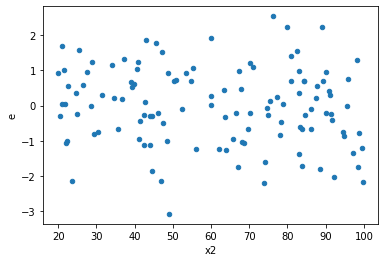

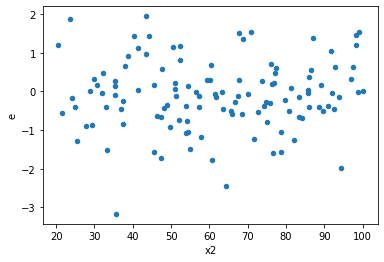

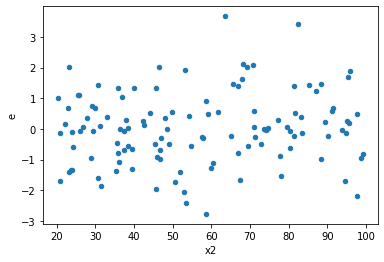

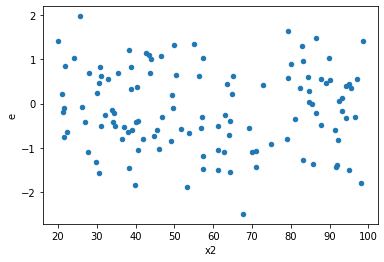

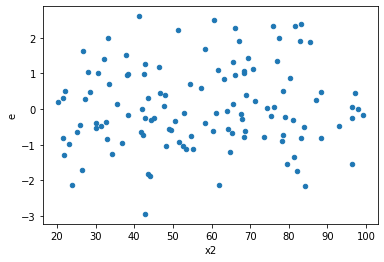

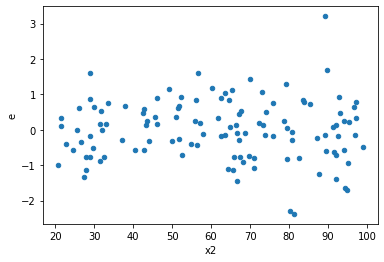

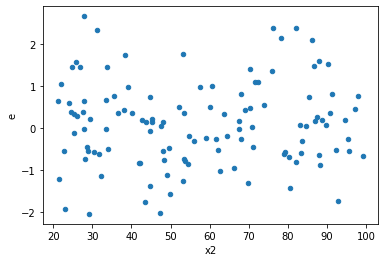

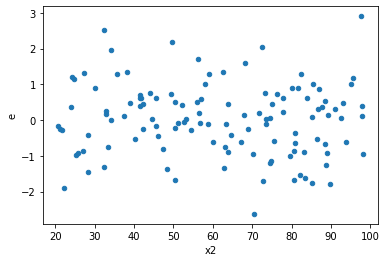

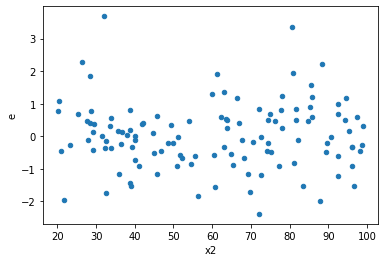

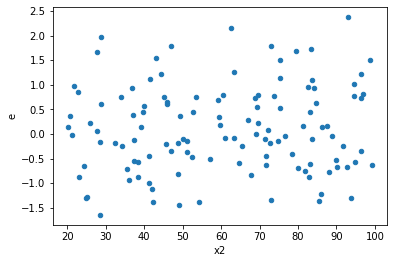

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,46.0,46.0,20791.006455676055,22655.46905249653,451.97840121034903,492.5101967934028,1.0896763993025198,0.7721121429160969,0.6139439285419516,0.38605607145804843,Reject005=1 : Homoscedasticity
7.0,46.0,46.0,20341.932500499213,25584.49690814879,442.21592392389596,556.1847153945389,1.2577220432483942,0.4397904061178881,0.780104796941056,0.21989520305894406,Reject005=1 : Homoscedasticity
10.0,46.0,46.0,20174.4171900656,20863.879742482775,438.57428674055654,453.56260309745164,1.0341750914498131,0.9097635600341238,0.5451182199829381,0.4548817800170619,Reject005=1 : Homoscedasticity
13.0,46.0,46.0,21476.678356561708,25151.28780359114,466.8843120991676,546.7671261650248,1.1710976616598971,0.5944296608775286,0.7027851695612357,0.2972148304387643,Reject005=1 : Homoscedasticity
14.0,46.0,46.0,11572.924094781061,15226.741086855918,251.58530640828394,331.0161105838243,1.3157211576046355,0.35548413221726083,0.8222579338913696,0.17774206610863041,Reject005=1 : Homoscedasticity
15.0,46.0,46.0,18054.039849882494,18488.765515333067,392.4791271713586,401.92968511593625,1.0240791351445588,0.9360380485736801,0.5319809757131599,0.46801902428684006,Reject005=1 : Homoscedasticity
16.0,46.0,46.0,11895.330470425237,18566.83631569054,258.5941406614182,403.6268764280552,1.5608508197273152,0.13476588629953268,0.9326170568502337,0.06738294314976634,Reject005=1 : Homoscedasticity
17.0,46.0,46.0,14750.392953726834,19530.97992079346,320.66071638536596,424.58652001724914,1.3240989566897445,0.34450042970925354,0.8277497851453732,0.17225021485462677,Reject005=1 : Homoscedasticity
21.0,46.0,46.0,24642.537727827897,29398.721369898965,535.7073419093022,639.1026384760645,1.1930070553042142,0.551953120009375,0.7240234399953125,0.2759765600046875,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,17672.662148499556,17272.76751921106,384.1883075760773,375.4949460698056,0.9773721340945541,0.9384685513420745,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,30677.634357531264,18082.689863282438,666.9050947289405,393.1019535496182,0.5894421210103247,0.07629136371568163,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,22179.210863698994,15493.252277653966,482.1567579064999,336.8098321229123,0.6985484007013061,0.2275144167146242,Reject005=1 : Homoscedasticity
3.0,46.0,46.0,13789.857552347423,11727.924125119804,299.7795120075527,254.95487228521313,0.8504746391033879,0.5850918385938034,Reject005=1 : Homoscedasticity
4.0,46.0,46.0,24620.629190124935,22353.192450347557,535.231069350542,485.9389663119034,0.9079050042845038,0.7445752824010786,Reject005=1 : Homoscedasticity
5.0,46.0,46.0,20791.006455676055,22655.46905249653,451.97840121034903,492.5101967934028,1.0896763993025198,0.7721121429160969,Reject005=1 : Homoscedasticity
6.0,46.0,46.0,23601.250725110658,17752.375971596117,513.0706679371882,385.92121677382863,0.7521794577059595,0.3376108430909209,Reject005=1 : Homoscedasticity
7.0,46.0,46.0,20341.932500499213,25584.49690814879,442.21592392389596,556.1847153945389,1.2577220432483942,0.4397904061178881,Reject005=1 : Homoscedasticity
8.0,46.0,46.0,29296.457886465538,24550.213350241647,636.8795192709899,533.7002902226445,0.83799254658644,0.5513478960328577,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      923
Reject005=0 : Heteroscedasticity     77
Name: Result_test, dtype: int64